In [1]:
# # Initial imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Load the data
df= pd.read_csv('Resources/myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset.
labels = df['MYOPIC']
df.drop(columns=['MYOPIC'], inplace=True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardize dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD','SPORTHR','READHR','COMPHR','STUDYHR',\
                                        'TVHR', 'DIOPTERHR']])

In [5]:
# Create dataframe of scaled data
scaled_df = pd.DataFrame(scaled_data, columns = df.columns[:12])
scaled_df['MOMMY'] = df['MOMMY']
scaled_df['DADMY'] = df['DADMY']
scaled_df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0


In [6]:
# Perform dimensionality reduction with PCA, keeping 90% of the explained variance
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the iris data.
myopia_pca = pca.fit_transform(scaled_df)

In [7]:
# Examine shape of reduced dataset
myopia_pca_df = pd.DataFrame(myopia_pca)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8
0,0.509064,1.240002,0.756795,-3.399057,-1.372825,-2.062353,-1.846270,0.142164,-1.354360
1,-0.659781,-1.479657,-0.443546,0.728013,-0.210619,0.132010,-0.434612,-0.627053,-0.354412
2,-0.905146,-0.816177,0.736691,-0.161225,0.903472,-0.048094,0.187300,0.075242,-0.172101
3,0.117579,1.143982,-0.978658,-1.216472,-2.095468,-1.900045,-0.315069,-0.541609,0.693329
4,-0.406560,-2.788647,0.560417,-0.462657,-0.278111,-0.882195,0.701336,0.528334,0.107169


In [8]:
# Create t-SNE model
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca_df)

tsne_features.shape

c:\Users\elott\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

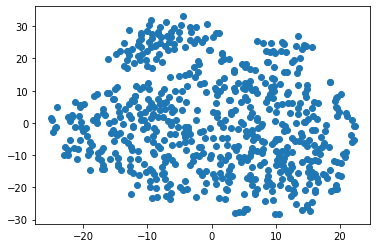

In [9]:
# Create plot of t-SNE reduced features
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [10]:
# Create a list of inertia's from one to ten, inclusive, using for loop
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


c:\Users\elott\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7091.966245
1,2,5938.640254
2,3,5173.168217
3,4,4811.269180
4,5,4536.128074
5,6,4311.887681
6,7,4122.724880
7,8,3963.732742
8,9,3834.277137
9,10,3729.990693


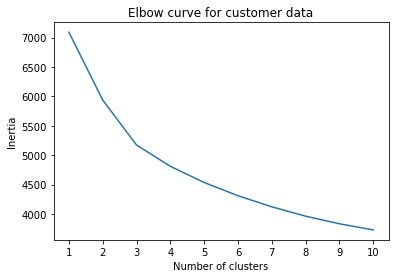

In [11]:
# Plot to examine elbows
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [13]:
# Create k-means model
# Initializing model 
model = KMeans(n_clusters=2, random_state=1)

# Fitting model
model.fit(myopia_pca_df)

# Predict clusters
predictions = model.predict(myopia_pca_df)

# Create return DataFrame with predicted clusters
myopia_pca_df["class"] = model.labels_

myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,class
0,0.509064,1.240002,0.756795,-3.399057,-1.372825,-2.062353,-1.846270,0.142164,-1.354360,1
1,-0.659781,-1.479657,-0.443546,0.728013,-0.210619,0.132010,-0.434612,-0.627053,-0.354412,0
2,-0.905146,-0.816177,0.736691,-0.161225,0.903472,-0.048094,0.187300,0.075242,-0.172101,0
3,0.117579,1.143982,-0.978658,-1.216472,-2.095468,-1.900045,-0.315069,-0.541609,0.693329,0
4,-0.406560,-2.788647,0.560417,-0.462657,-0.278111,-0.882195,0.701336,0.528334,0.107169,0


### Conclusion <br>
##### According to both the t-SNE and K-means models patients can be grouped into one of two groups, either myopic or non-myopic, as both models produced two distinct groups. The scatter plot of t-SNE model shows that while the two clusters are relatively close together, they are distinct, with the normal vision group being much larger, as expected. The k-means model confirms the t-SNE model.